# Starbucks Location WorldWide

This Dataset was taken from https://www.kaggle.com/starbucks

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
sns.set(style="white", context="talk")

In [3]:
#Importing in dataset
starbucks = pd.read_csv("starbucks_dataset.csv")

In [4]:
starbucks.head(5)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [5]:
starbucks.shape

(25600, 13)

#### There are 25600 lines of data. Does that mean there are 25600 starbucks coffee shops worldwide?

In [6]:
starbucks.notnull().sum()

Brand             25600
Store Number      25600
Store Name        25600
Ownership Type    25600
Street Address    25598
City              25585
State/Province    25600
Country           25600
Postcode          24078
Phone Number      18739
Timezone          25600
Longitude         25599
Latitude          25599
dtype: int64

#### There seems be 25600 unique store numbers. So let's assume for now that there are 25600 shops operating around the world.

### How many countries have stores?

In [180]:
len(starbucks.Country.unique())

73

### Which country has most shops?

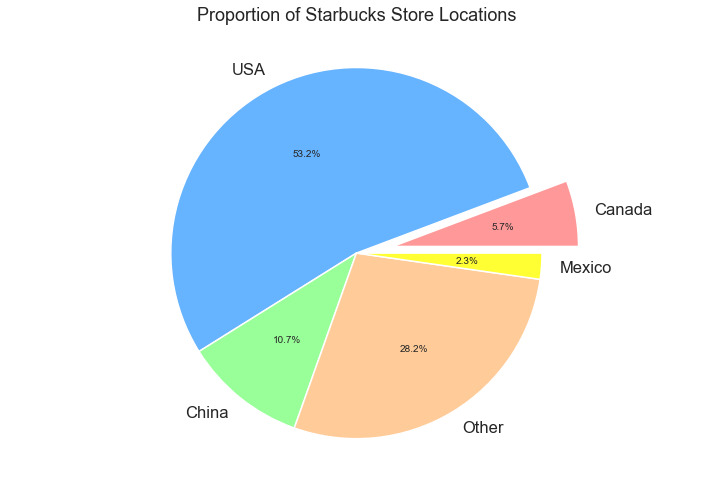

In [178]:
x = [starbucks[starbucks.Country == 'CA']['Store Number'].count(), 
    starbucks[starbucks.Country == 'US']['Store Number'].count(),
    starbucks[starbucks.Country == 'CN']['Store Number'].count(),
    
    25600 - starbucks[starbucks.Country == 'CA']['Store Number'].count() - 
    starbucks[starbucks.Country == 'US']['Store Number'].count()-
    starbucks[starbucks.Country == 'CN']['Store Number'].count()-
    starbucks[starbucks.Country == 'MX']['Store Number'].count(),
     starbucks[starbucks.Country == 'MX']['Store Number'].count(),]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set(title = "Proportion of Starbucks Store Locations")
labels = ["Canada", "USA", "China","Other","Mexico"]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#FFFF33']
plt.axis('equal')
plt.pie(x ,autopct='%1.1f%%', labels = labels, colors = colors, explode = (0.2, 0,0,0,0))
plt.tight_layout()
plt.show()

To my surprise, there are more Starbucks shops across the sea in China than USA's neighbouring countries combined.

### Cities?

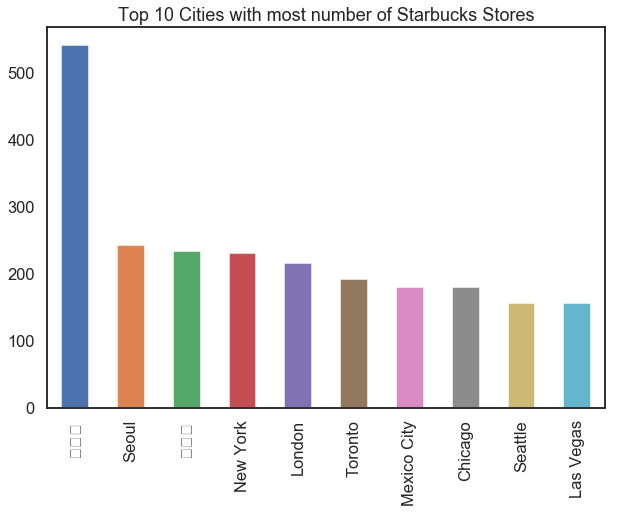

In [9]:

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set(title = "Top 10 Cities with most number of Starbucks Stores")
starbucks.City.value_counts().head(10).plot(kind="bar")
plt.show()

The first bar is Shanghai, China and the second bar is Beijing, China

### Who owns these stores?

In [10]:
starbucks['Ownership Type'].value_counts()

Company Owned    11932
Licensed          9375
Joint Venture     3976
Franchise          317
Name: Ownership Type, dtype: int64

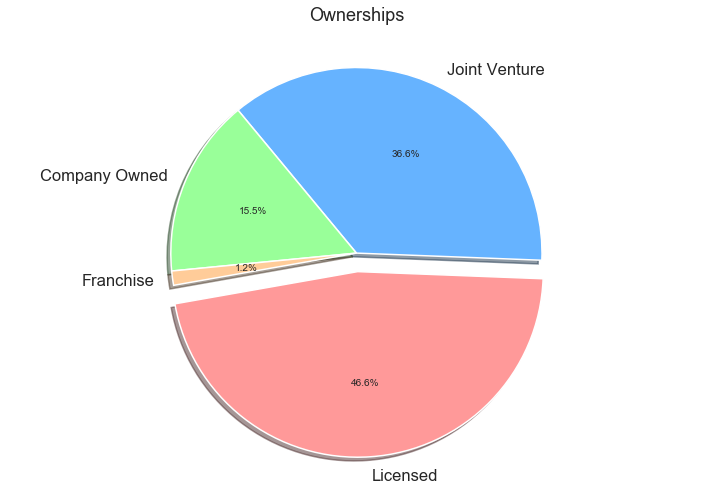

In [11]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set(title = "Ownerships")
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.axis('equal')
plt.pie(starbucks['Ownership Type'].value_counts(), labels = starbucks['Ownership Type'].unique(),autopct='%1.1f%%',
       shadow=True, startangle=190, colors = colors, explode = (0.1, 0, 0, 0))
plt.tight_layout()
plt.show()

Starbucks is not a franchise, so I'm not surprise to see that almost all of it's stores are either corporate owned or liscensed shops, which means your store is technically owned by Starbucks. The major differences between corporate and licensed includes  employee benefits, and some customers may experience higher prices and no rewards system, but its mainly the employees whom are affected due to different store owners.

### Let's look at specifically the stores in Canada

In [13]:
starbucks[starbucks.Country == 'CA']['City'].value_counts().head(10)

Toronto        192
Calgary        130
Vancouver      110
Edmonton        81
Montreal        59
Winnipeg        49
Ottawa          42
Mississauga     39
Surrey          30
Victoria        29
Name: City, dtype: int64

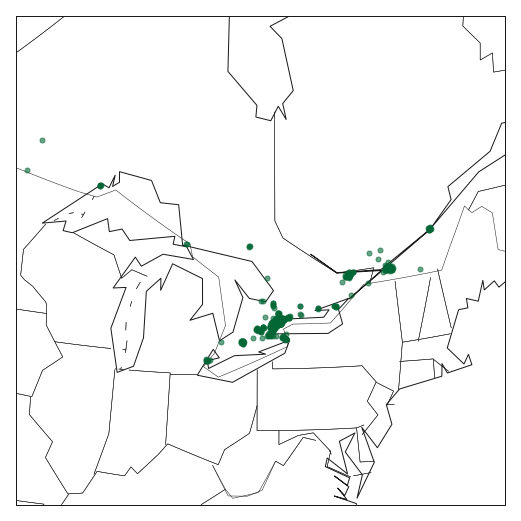

In [88]:
plt.figure(figsize=(12,9))
m = Basemap(width=2000000,height=2000000,resolution='c',projection='aea',lat_0=46,lon_0=-80.34,)
m.drawcoastlines()
m.drawcountries()
m.bluemarble()
m.drawmapboundary(fill_color='white')
m.drawstates(linewidth=0.5, linestyle='solid', color='k')

x, y = m(list(starbucks[starbucks.Country == 'CA']["Longitude"].astype(float)), list(starbucks[starbucks.Country == 'CA']["Latitude"].astype(float)))
m.plot(x, y, 'bo', markersize = 5, alpha = 0.6, color = "#036635")


Looks like majority of the Stores in Canada are located in major Cities in Southern Ontario (Toronto, Montreal, and Mississauga)

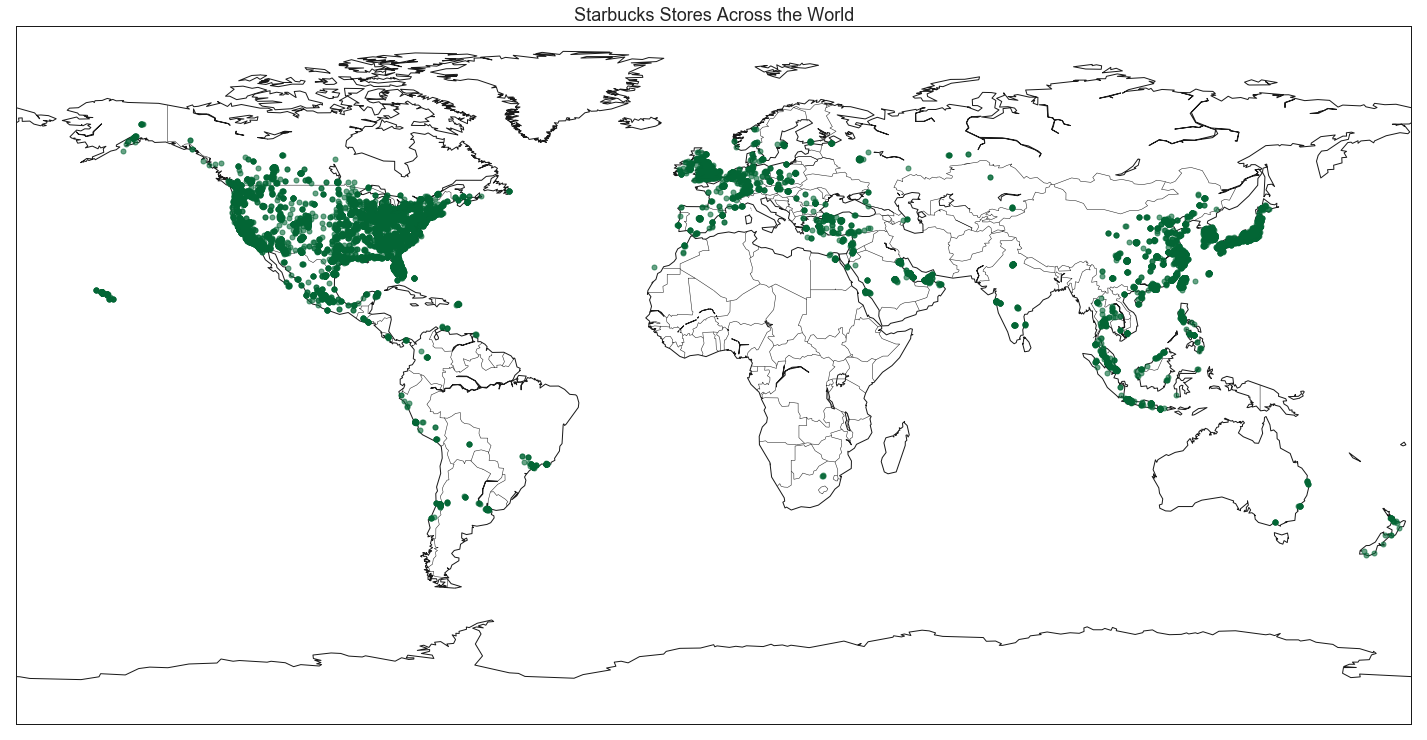

In [197]:
plt.figure(figsize=(25,17))
k = Basemap()
k.drawcoastlines()
k.drawcountries()

k.drawmapboundary(fill_color='white')

x, y = k(list(starbucks["Longitude"].astype(float)), list(starbucks["Latitude"].astype(float)))
k.plot(x, y, 'bo', markersize = 5, alpha = 0.6, color = "#036635")

plt.title('Starbucks Stores Across the World')
plt.show()